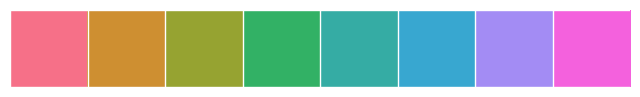

In [407]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))

In [393]:
# Queens data from January - February
jan=pd.read_excel('/Users/stella/Desktop/data/Particulate Data.xls')[1:]
feb=pd.read_excel('/Users/stella/Desktop/data/Particle Data_February 2017.xls')[1:]

In [394]:
del jan['Unnamed: 2'], jan['Unnamed: 4'], jan['Unnamed: 6'], jan['Unnamed: 8'], jan['Unnamed: 10']
del feb['Unnamed: 2'], feb['Unnamed: 4'], feb['Unnamed: 6'], feb['Unnamed: 8'], feb['Unnamed: 10']

In [395]:
jan=jan.rename(index=str, columns={"Station: Queens College  Periodically: 1/1/2017 12:00 AM-2/13/2017 4:00 PM  Type: AVG 1 Min. [1 Min.]":"Datetime",
                                   "Unnamed: 1":"PM2.5_MC (ug/m3)",
                                   "Unnamed: 3":"PMcrs_MC (ug/m3)",
                                   "Unnamed: 5":"PM10_MC (ug/m3)",
                                   "Unnamed: 7":"Ultrafine (#/cm3)",
                                   "Unnamed: 9":"PM2.5_FEM_MC (ug/m3)"
                                  })

In [396]:
feb=feb.rename(index=str, columns={"SiteReport - Site Queens College Report : TimeBeginning":"Datetime",
                                   "Unnamed: 1":"PM2.5_MC (ug/m3)",
                                   "Unnamed: 3":"PM2.5_FEM_MC (ug/m3)",
                                   "Unnamed: 5":"PMcrs_MC (ug/m3)",
                                   "Unnamed: 7":"PM10_MC (ug/m3)",
                                   "Unnamed: 9":"Ultrafine (#/cm3)"
                                  })

In [397]:
jan=jan[3:].reset_index()
feb=feb[2:-8].reset_index()
del jan['index'], feb['index']

In [398]:
jf=pd.concat([jan,feb]).reset_index()
del jf['index']

In [399]:
jf['Datetime']=jf['Datetime'].apply(lambda x: parse(x))

In [400]:
del jf['PM10_MC (ug/m3)'],jf['PMcrs_MC (ug/m3)']

In [401]:
jf=jf[(jf['PM2.5_FEM_MC (ug/m3)'].apply(lambda x: type(x)!=str)) &
(jf['PM2.5_MC (ug/m3)'].apply(lambda x: type(x)!=str)) &
(jf['Ultrafine (#/cm3)'].apply(lambda x: type(x)!=str))]

In [402]:
jf.head()

,Datetime,PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),Ultrafine (#/cm3)
0,2017-01-01 00:00:00,3,3.7,8270
1,2017-01-01 00:01:00,3,3.7,8450
2,2017-01-01 00:02:00,3,3.7,9620
3,2017-01-01 00:03:00,3,3.7,9670
4,2017-01-01 00:04:00,3,3.7,8430


In [403]:
test=jf.copy(False)

In [404]:
test=test.reset_index()
test['month']=test['Datetime'].apply(lambda x: x.month)
test['day']=test['Datetime'].apply(lambda x: x.day)

In [405]:
test2=test.groupby([test['month'],test['day']]).mean()

In [406]:
test=test[test['PM2.5_FEM_MC (ug/m3)']>0]
test=test[test['PM2.5_MC (ug/m3)']>0]
test=test[test['Ultrafine (#/cm3)']>0]

test2['PM2.5_FEM_MC (ug/m3)']=test2['PM2.5_FEM_MC (ug/m3)'].apply(lambda x: float(x))
test2['PM2.5_MC (ug/m3)']=test2['PM2.5_MC (ug/m3)'].apply(lambda x: float(x))
test2['Ultrafine (#/cm3)']=test2['Ultrafine (#/cm3)'].apply(lambda x: float(x))

KeyError: 'PM2.5_FEM_MC (ug/m3)'

In [147]:
test2=test.copy(False)

In [151]:
float(test2['PM2.5_FEM_MC (ug/m3)'][0])

0.4

In [153]:
test2['PM2.5_FEM_MC (ug/m3)']=test2['PM2.5_FEM_MC (ug/m3)'].apply(lambda x: float(x))
test2['PM2.5_MC (ug/m3)']=test2['PM2.5_MC (ug/m3)'].apply(lambda x: float(x))
test2['Ultrafine (#/cm3)']=test2['Ultrafine (#/cm3)'].apply(lambda x: float(x))

In [156]:
test3=test2.groupby([test2['month'],test2['day']]).mean()

In [157]:
test3

PM2.5_FEM_MC (ug/m3)  PM2.5_MC (ug/m3)  Ultrafine (#/cm3)  month  \
month day                                                                     
1     5                5.027912          5.929890       15271.188278      1   
      6                7.772620          8.934885       26483.416261      1   
      7                5.891944          6.869097       11454.111111      1   
      8                5.000311          5.898523       17779.486781      1   
      9                5.330213          6.242199       24773.262411      1   
      10               5.653116          6.623188       25470.115942      1   
      11               9.084479         10.328494       26778.869498      1   
      12               7.199097          8.320972       21926.916667      1   
      13               3.548123          4.250881       26919.141762      1   
      14               4.631290          5.458201       12326.222134      1   
      15               8.597917          9.856389       29992.083333      1   
      16              11.605972         13.052986       21360.788194      1   
      17              19.986518         21.754065       15541.365532      1   
      18               3.510161          4.219006       15956.359649      1   
      19               5.215087          6.099469       27660.174375      1   
      20               6.256542          7.280949       17170.948738      1   
      21              15.909861         17.580694       10314.884028      1   
      22              11.886881         13.344033        7057.441033      1   
      23               2.580058          3.152529        4390.492218      1   
      24               1.773908          2.223333       20938.022989      1   
      25               3.678479          4.386388       22209.306464      1   
      26               7.730769          8.816737       20163.765850      1   
      27               1.869246          2.318903       12699.216454      1   
      28               4.016150          4.791608       10340.038787      1   
      29               7.639931          8.766389       13006.152778      1   
      30               5.157657          6.081439       22630.088167      1   
      31               9.168144         10.450299       19202.874251      1   
2     1                7.129895          8.159909       16205.891854      2   
      2                3.854165          4.601712       21692.328816      2   
      3                5.119666          6.002893       22465.838279      2   
      4                4.471524          5.276376       13493.824042      2   
      5               10.092701         11.460153       11272.838194      2   
      6               11.490326         12.925215       23410.833333      2   
      7               15.095170         16.696233       15978.359972      2   
      8                9.030677         10.191239       23484.188034      2   
      9                2.454628          3.002641       11288.812500      2   
      10               4.699576          5.520342       17706.583643      2   
      11              14.628093         16.125942       22775.927568      2   
      12               8.867469          9.981661       13905.338745      2   
      13               3.503248          4.194450       23304.635149      2   
      14               7.063076          8.173223       29041.284875      2   
      15              10.086009         11.344664       21883.913303      2   
      16               3.188608          3.845499       22795.211910      2   
      17               5.338285          6.287257       21061.222222      2   
      18              10.098277         11.437860       18860.430855      2   
      19               7.269807          8.366152       18758.419170      2   
      20               5.946728          6.446301       25115.316591      2   
      21               3.479935          4.166892       22924.776241      2   
      22               7.657448          8.793112       27133

In [408]:
# INDOOR DATA
ildsa=pd.read_excel('/Users/stella/Desktop/data/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=0).set_index('time')
ipm25=pd.read_excel('/Users/stella/Desktop/data/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=1).set_index('time')
ipn=pd.read_excel('/Users/stella/Desktop/data/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=2).set_index('time')
indoor=(ildsa.join(ipm25)).join(ipn).reset_index()
indoor=indoor.rename(index=str, columns={'time':'Datetime',
                                         'value (µm²/cm³)':'ldsa (um2/cm3)',
                                         'value (µg/m³)':'pm25 (ug/m3)',
                                         'value (1/cm³)':'pn (P/cm3)'})

In [410]:
# URBAN DATA
urban=pd.read_csv('/Users/stella/Desktop/data/1329_PEGASOR A_20170316200803_v2.csv')

In [411]:
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))

In [412]:
urban=urban.rename(columns={'MEASURE_PA_LABEL':'LDSA (um2/cm3)',
                      'MEASURE_MG_LABEL':'PN (#/cm3)',
                      'MEASURE_N_LABEL':'PM2.5 (ug/m3)',
                      'MEASURE_PA_LABEL.1':'LDSA-1 (um2/cm3)',
                      'MEASURE_MG_LABEL.1':'PN-1 (#/cm3)',
                      'MEASURE_N_LABEL.1':'PM2.5-1 (ug/m3)',
                      'MEASURE_PA_LABEL.2':'LDSA-2 (um2/cm3)',
                      'MEASURE_MG_LABEL.2':'PN-2 (#/cm3)',
                      'MEASURE_N_LABEL.2':'PM2.5-2 (ug/m3)'
                     })

In [413]:
#urban=urban.set_index('DateTime')
#jf=jf.set_index('Datetime')

In [414]:
df=jf.join(urban)

In [415]:
df.head()

,Datetime,PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),Ultrafine (#/cm3),DateTime,LDSA (um2/cm3),PN (#/cm3),PM2.5 (ug/m3),LDSA-1 (um2/cm3),PN-1 (#/cm3),PM2.5-1 (ug/m3),LDSA-2 (um2/cm3),PN-2 (#/cm3),PM2.5-2 (ug/m3)
0,2017-01-01 00:00:00,3,3.7,8270,2017-01-04 15:02:00,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191
1,2017-01-01 00:01:00,3,3.7,8450,2017-01-04 15:03:00,4.499,3684.353,0.177,4.595,3346.061,0.161,4.712,3913.317,0.188
2,2017-01-01 00:02:00,3,3.7,9620,2017-01-04 15:04:00,4.666,3820.196,0.183,4.595,3346.061,0.161,4.712,3913.317,0.188
3,2017-01-01 00:03:00,3,3.7,9670,2017-01-04 15:05:00,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178
4,2017-01-01 00:04:00,3,3.7,8430,2017-01-04 15:06:00,4.666,3820.196,0.183,4.362,3175.265,0.152,4.454,3697.959,0.178


In [416]:
df=df.reset_index()

In [417]:
df=df[(df['Datetime']>=datetime.date(2017,1,5)) & (df['Datetime']<datetime.date(2017,3,1))]

In [418]:
df.columns

Index(['index', 'Datetime', 'PM2.5_FEM_MC (ug/m3)', 'PM2.5_MC (ug/m3)',
       'Ultrafine (#/cm3)', 'DateTime', 'LDSA (um2/cm3)', 'PN (#/cm3)',
       'PM2.5 (ug/m3)', 'LDSA-1 (um2/cm3)', 'PN-1 (#/cm3)', 'PM2.5-1 (ug/m3)',
       'LDSA-2 (um2/cm3)', 'PN-2 (#/cm3)', 'PM2.5-2 (ug/m3)'],
      dtype='object')

In [419]:
df=df[(df['LDSA (um2/cm3)']>0) &
(df['LDSA-1 (um2/cm3)']>0) &
(df['LDSA-2 (um2/cm3)']>0) &
(df['PM2.5 (ug/m3)']>0) &
(df['PM2.5-1 (ug/m3)']>0) &
(df['PM2.5-2 (ug/m3)']>0) &
(df['PM2.5_FEM_MC (ug/m3)']>0) &
(df['PM2.5_MC (ug/m3)']>0) &
(df['PN (#/cm3)']>0) &
(df['PN-1 (#/cm3)']>0) &
(df['PN-2 (#/cm3)']>0) &
(df['Ultrafine (#/cm3)']>0)]

In [420]:
df['PM2.5_FEM_MC (ug/m3)']=df['PM2.5_FEM_MC (ug/m3)'].apply(lambda x: float(x))
df['PM2.5_MC (ug/m3)']=df['PM2.5_MC (ug/m3)'].apply(lambda x: float(x))
df['Ultrafine (#/cm3)']=df['Ultrafine (#/cm3)'].apply(lambda x: float(x))

In [159]:
df.head()

,Datetime,PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),Ultrafine (#/cm3),LDSA (um2/cm3),PN (#/cm3),PM2.5 (ug/m3),LDSA-1 (um2/cm3),PN-1 (#/cm3),PM2.5-1 (ug/m3),LDSA-2 (um2/cm3),PN-2 (#/cm3),PM2.5-2 (ug/m3)
0,2017-01-05 00:00:00,0.4,0.6,8410.0,7.685,6319.262,0.303,6.649,4858.628,0.233,6.774,5642.227,0.271
1,2017-01-05 00:01:00,0.4,0.6,8215.0,7.685,6319.262,0.303,6.664,4868.934,0.234,6.747,5618.536,0.270
2,2017-01-05 00:02:00,0.4,0.6,8365.0,7.685,6319.262,0.303,6.664,4868.934,0.234,6.747,5618.536,0.270
16,2017-01-05 00:16:00,0.3,0.4,7000.0,8.219,6769.342,0.325,6.322,4627.650,0.222,6.368,5313.509,0.255
17,2017-01-05 00:17:00,0.3,0.4,6875.0,8.219,6769.342,0.325,6.186,4528.745,0.217,6.292,5251.304,0.252


In [351]:
urban=urban.reset_index()

In [354]:
urban=urban[(urban['DateTime']>=datetime.date(2017,1,5))&(urban['DateTime']<datetime.date(2017,3,1))]
urban=urban.reset_index()
del urban['index']

In [356]:
del urban['LDSA (um2/cm3)'],urban['PN (#/cm3)'],urban['PM2.5 (ug/m3)']

In [358]:
del urban['PN-1 (#/cm3)'],urban['PN-2 (#/cm3)'],urban['PM2.5-1 (ug/m3)'],urban['PM2.5-2 (ug/m3)']

In [360]:
del urban['LDSA-1 (um2/cm3)']

In [362]:
urban_count=urban.groupby([urban['DateTime'].apply(lambda x: x.month),urban['DateTime'].apply(lambda x: x.day)]).count()

In [364]:
urban_count.index.names = ['month', 'day']

In [371]:
urban_count=urban_count.reset_index()

In [368]:
urban_count['date']=''

In [372]:
for i in range(0,len(urban_count)):
    cur_date=datetime.date(2017,urban_count['month'][i],urban_count['day'][i])
    urban_count['date'][i]=cur_date

/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [375]:
del urban_count['month'],urban_count['day']

In [377]:
del urban_count['DateTime']

(0, 1)

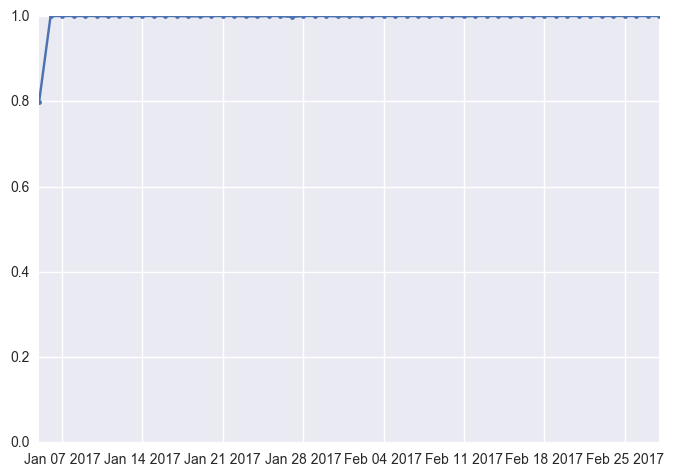

In [382]:
plt.plot(urban_count['date'],urban_count['LDSA-2 (um2/cm3)']/1440,'.-')
plt.ylim([0,1])

In [173]:
daily=df.groupby([df['Datetime'].apply(lambda x: x.month),df['Datetime'].apply(lambda x: x.day)]).mean()

In [174]:
daily.head()

PM2.5_FEM_MC (ug/m3)  PM2.5_MC (ug/m3)  Ultrafine (#/cm3)  \
Datetime Datetime                                                              
1        5                     5.045756          5.952952       14435.571956   
         6                     7.770787          8.933216       26484.646067   
         7                     5.892842          6.870049       11457.748436   
         8                     5.008222          5.907283       17781.534847   
         9                     5.330213          6.242199       24773.262411   

                   LDSA (um2/cm3)    PN (#/cm3)  PM2.5 (ug/m3)  \
Datetime Datetime                                                
1        5              18.414542  15219.329315       0.730545   
         6              32.124031  26518.546435       1.272886   
         7              21.880371  18043.211771       0.866051   
         8              22.469759  18535.636573       0.889713   
         9              39.979660  33010.235552       1.584459   

                   LDSA-1 (um2/cm3)  PN-1 (#/cm3)  PM2.5-1 (ug/m3)  \
Datetime Datetime                                                    
1        5                16.451731  12230.657245         0.587071   
         6                31.562399  23460.140199         1.126079   
         7                21.463685  16100.999698         0.772842   
         8                24.862926  18672.276890         0.896259   
         9                40.841777  30579.735018         1.467826   

                   LDSA-2 (um2/cm3)  PN-2 (#/cm3)  PM2.5-2 (ug/m3)  
Datetime Datetime                                                   
1        5                16.528423  13922.157675         0.668281  
         6                30.042996  25295.531879         1.214171  
         7                20.141753  17066.103185         0.819165  
         8                21.020603  17764.601557         0.852701  
         9                39.738922  33718.990271         1.618503

In [175]:
daily.index.names = ['month', 'day']

In [176]:
daily=daily.reset_index()

In [177]:
daily.head()

,month,day,PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),Ultrafine (#/cm3),LDSA (um2/cm3),PN (#/cm3),PM2.5 (ug/m3),LDSA-1 (um2/cm3),PN-1 (#/cm3),PM2.5-1 (ug/m3),LDSA-2 (um2/cm3),PN-2 (#/cm3),PM2.5-2 (ug/m3)
0,1,5,5.045756,5.952952,14435.571956,18.414542,15219.329315,0.730545,16.451731,12230.657245,0.587071,16.528423,13922.157675,0.668281
1,1,6,7.770787,8.933216,26484.646067,32.124031,26518.546435,1.272886,31.562399,23460.140199,1.126079,30.042996,25295.531879,1.214171
2,1,7,5.892842,6.870049,11457.748436,21.880371,18043.211771,0.866051,21.463685,16100.999698,0.772842,20.141753,17066.103185,0.819165
3,1,8,5.008222,5.907283,17781.534847,22.469759,18535.636573,0.889713,24.862926,18672.276890,0.896259,21.020603,17764.601557,0.852701
4,1,9,5.330213,6.242199,24773.262411,39.979660,33010.235552,1.584459,40.841777,30579.735018,1.467826,39.738922,33718.990271,1.618503


In [178]:
daily['date']=''

In [179]:
for i in range(0,len(daily)):
    cur_date=datetime.date(2017,daily['month'][i],daily['day'][i])
    daily['date'][i]=cur_date

/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [180]:
daily.head()

,month,day,PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),Ultrafine (#/cm3),LDSA (um2/cm3),PN (#/cm3),PM2.5 (ug/m3),LDSA-1 (um2/cm3),PN-1 (#/cm3),PM2.5-1 (ug/m3),LDSA-2 (um2/cm3),PN-2 (#/cm3),PM2.5-2 (ug/m3),date
0,1,5,5.045756,5.952952,14435.571956,18.414542,15219.329315,0.730545,16.451731,12230.657245,0.587071,16.528423,13922.157675,0.668281,2017-01-05
1,1,6,7.770787,8.933216,26484.646067,32.124031,26518.546435,1.272886,31.562399,23460.140199,1.126079,30.042996,25295.531879,1.214171,2017-01-06
2,1,7,5.892842,6.870049,11457.748436,21.880371,18043.211771,0.866051,21.463685,16100.999698,0.772842,20.141753,17066.103185,0.819165,2017-01-07
3,1,8,5.008222,5.907283,17781.534847,22.469759,18535.636573,0.889713,24.862926,18672.276890,0.896259,21.020603,17764.601557,0.852701,2017-01-08
4,1,9,5.330213,6.242199,24773.262411,39.979660,33010.235552,1.584459,40.841777,30579.735018,1.467826,39.738922,33718.990271,1.618503,2017-01-09


In [181]:
daily2=daily.copy(False)

In [182]:
del daily2['month'],daily2['day'],daily2['LDSA (um2/cm3)'],daily2['PN (#/cm3)'],daily2['PM2.5 (ug/m3)']

In [202]:
del daily2['LDSA-1 (um2/cm3)'],daily2['LDSA-2 (um2/cm3)']

In [203]:
daily2.head()

,PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),Ultrafine (#/cm3),PN-1 (#/cm3),PM2.5-1 (ug/m3),PN-2 (#/cm3),PM2.5-2 (ug/m3),date
0,5.045756,5.952952,14435.571956,12230.657245,0.587071,13922.157675,0.668281,2017-01-05
1,7.770787,8.933216,26484.646067,23460.140199,1.126079,25295.531879,1.214171,2017-01-06
2,5.892842,6.870049,11457.748436,16100.999698,0.772842,17066.103185,0.819165,2017-01-07
3,5.008222,5.907283,17781.534847,18672.276890,0.896259,17764.601557,0.852701,2017-01-08
4,5.330213,6.242199,24773.262411,30579.735018,1.467826,33718.990271,1.618503,2017-01-09


r-squared: 0.499699461588
y = 0.06x + 0.49
7.551292393655115


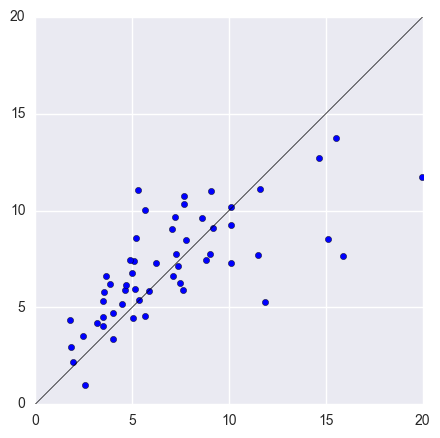

In [250]:
x=daily2['PM2.5_FEM_MC (ug/m3)']
y=daily2['PM2.5-1 (ug/m3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('y = %sx + %s' % (round(slope,2),round(intercept,2)))
plt.figure(figsize=(5,5))
plt.xlim(0,20)
plt.ylim(0,20)
plt.scatter(x,y*(x/y).mean())
plt.plot([0,20], [0, 20], color='k', linestyle='-', linewidth=0.5)

print((x/y).mean())

r-squared: 0.508238477733
y = 0.08x + 0.55
6.302404483951551


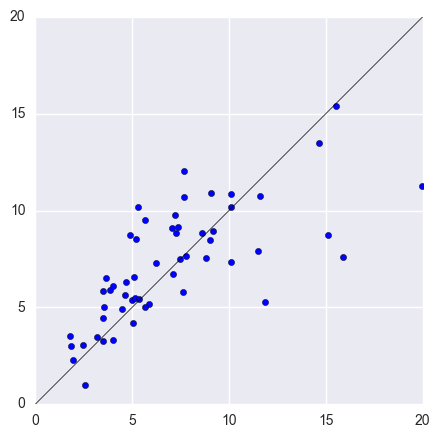

In [252]:
x=daily2['PM2.5_FEM_MC (ug/m3)']
y=daily2['PM2.5-2 (ug/m3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('y = %sx + %s' % (round(slope,2),round(intercept,2)))
plt.figure(figsize=(5,5))
plt.xlim(0,20)
plt.ylim(0,20)
plt.scatter(x,y*(x/y).mean())
print((x/y).mean())
plt.plot([0,20], [0, 20], color='k', linestyle='-', linewidth=0.5)

r-squared: 0.278403680052
y = 0.67x + 6780.28


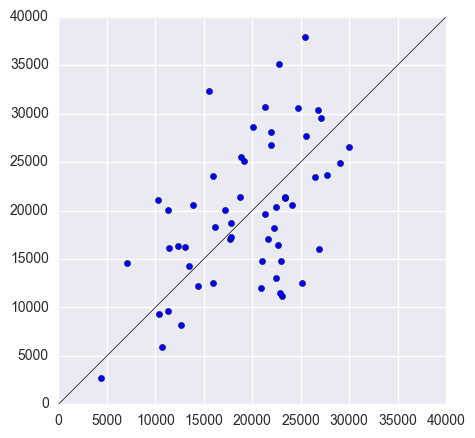

In [225]:
x=daily2['Ultrafine (#/cm3)']
y=daily2['PN-1 (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('y = %sx + %s' % (round(slope,2),round(intercept,2)))
plt.figure(figsize=(5,5))
plt.xlim(0,40000)
plt.ylim(0,40000)
plt.scatter(x,y)
plt.plot([0,40000], [0, 40000], color='k', linestyle='-', linewidth=0.5)

r-squared: 0.258610041712
y = 0.83x + 7668.6


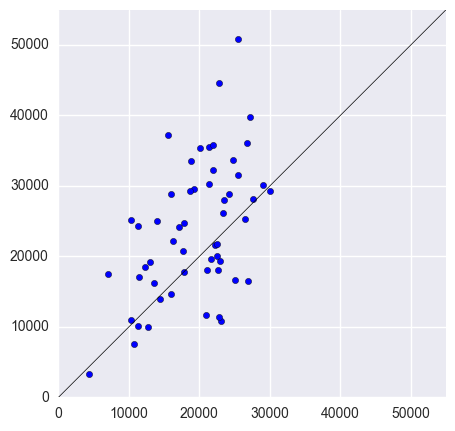

In [226]:
x=daily2['Ultrafine (#/cm3)']
y=daily2['PN-2 (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('y = %sx + %s' % (round(slope,2),round(intercept,2)))
plt.figure(figsize=(5,5))
plt.xlim(0,55000)
plt.ylim(0,55000)
plt.scatter(x,y)
plt.plot([0,55000], [0, 55000], color='k', linestyle='-', linewidth=0.5)

In [254]:
df2=df.copy(False)

In [256]:
del df2['LDSA (um2/cm3)'], df2['PN (#/cm3)'], df2['PM2.5 (ug/m3)']

In [258]:
del df2['LDSA-2 (um2/cm3)'], df2['PN-2 (#/cm3)'], df2['PM2.5-2 (ug/m3)']

In [260]:
del df2['LDSA-1 (um2/cm3)']

In [265]:
df_count=df2.groupby([df['Datetime'].apply(lambda x: x.month),df['Datetime'].apply(lambda x: x.day)]).count()

In [267]:
df_count.index.names = ['month', 'day']

In [270]:
df_count=df_count.reset_index()

In [272]:
del df_count['PM2.5-1 (ug/m3)'],df_count['PM2.5_FEM_MC (ug/m3)'],df2['Ultrafine (#/cm3)']

In [274]:
del df_count['PM2.5_MC (ug/m3)'],df_count['PN-1 (#/cm3)']

In [276]:
del df_count['Ultrafine (#/cm3)']

In [279]:
df_count['date']=''

In [280]:
for i in range(0,len(df_count)):
    cur_date=datetime.date(2017,df_count['month'][i],df_count['day'][i])
    df_count['date'][i]=cur_date

/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [282]:
del df_count['month'],df_count['day']

In [284]:
df_count['pct']=df_count['Datetime']/1440

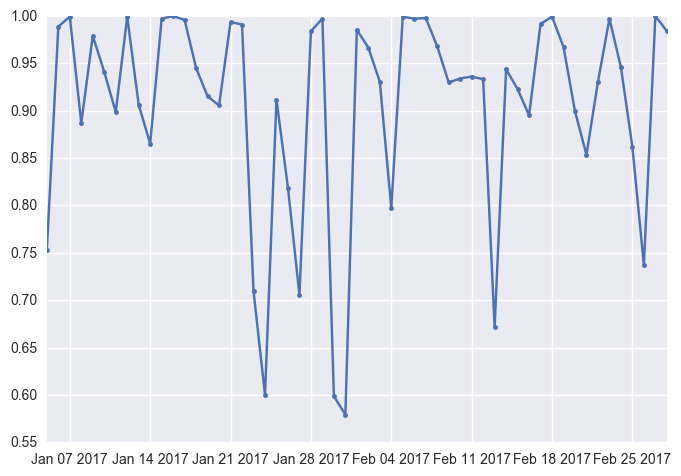

In [336]:
plt.plot(df_count['date'],df_count['pct'],'.-')
#plt.ylim([0,1])

In [297]:
daily2['pct']=df_count['pct']

In [342]:
daily2

,PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),Ultrafine (#/cm3),PN-1 (#/cm3),PM2.5-1 (ug/m3),PN-2 (#/cm3),PM2.5-2 (ug/m3),date,pct
0,5.045756,5.952952,14435.571956,12230.657245,0.587071,13922.157675,0.668281,2017-01-05,0.752778
1,7.770787,8.933216,26484.646067,23460.140199,1.126079,25295.531879,1.214171,2017-01-06,0.988889
2,5.892842,6.870049,11457.748436,16100.999698,0.772842,17066.103185,0.819165,2017-01-07,0.999306
3,5.008222,5.907283,17781.534847,18672.276890,0.896259,17764.601557,0.852701,2017-01-08,0.886806
4,5.330213,6.242199,24773.262411,30579.735018,1.467826,33718.990271,1.618503,2017-01-09,0.979167
5,5.641845,6.609963,25525.726937,27654.340297,1.327405,31479.962892,1.511054,2017-01-10,0.940972
6,9.080912,10.324652,26784.533230,30375.449978,1.458003,36064.848991,1.731125,2017-01-11,0.898611
7,7.197220,8.318902,21925.059069,26721.555188,1.282642,32234.275771,1.547234,2017-01-12,0.999306
8,3.548123,4.250881,26919.141762,16026.836313,0.769282,16565.859166,0.795167,2017-01-13,0.906250
9,4.639005,5.466372,12287.788925,16341.092234,0.784371,18561.669239,0.890950,2017-01-14,0.865278


In [312]:
pct=.9

r-squared: 0.367364790637
y = 0.05x + 0.66
38 out of 55
7.7679805560254245


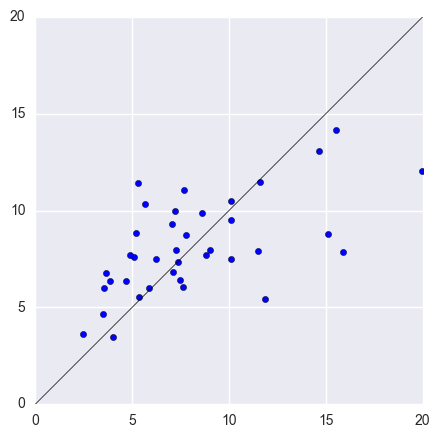

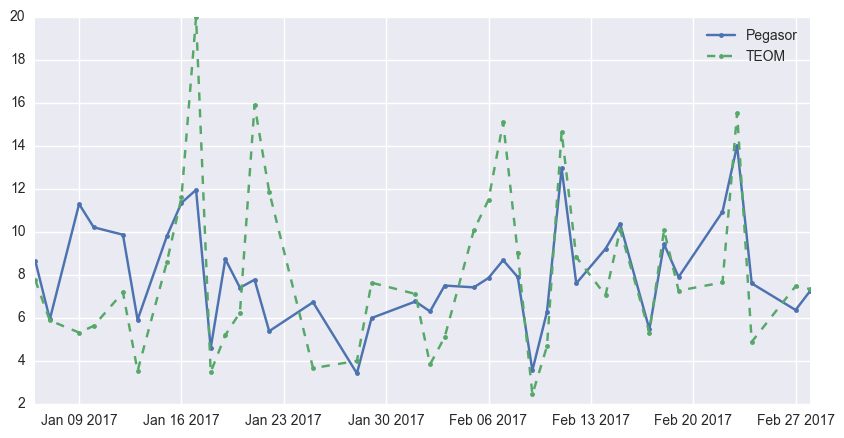

In [341]:
x=daily2['PM2.5_FEM_MC (ug/m3)'][daily2['pct']>pct]
y=daily2['PM2.5-1 (ug/m3)'][daily2['pct']>pct]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('y = %sx + %s' % (round(slope,2),round(intercept,2)))
plt.figure(figsize=(5,5))
plt.xlim(0,20)
plt.ylim(0,20)
plt.scatter(x,y*(x/y).mean())
plt.plot([0,20], [0, 20], color='k', linestyle='-', linewidth=0.5)
print(len(x),'out of',len(daily2))
print((x/y).mean())
plt.figure(figsize=(10,5))
plt.plot(daily2['date'][daily2['pct']>pct],(daily2['PM2.5-1 (ug/m3)'][daily2['pct']>pct]*7.7),'.-',label='Pegasor')
plt.plot(daily2['date'][daily2['pct']>pct],daily2['PM2.5_FEM_MC (ug/m3)'][daily2['pct']>pct],'.--',label='TEOM')
plt.legend()

r-squared: 0.372219469629
y = 0.06x + 0.77
38 out of 55
6.4073968212161745


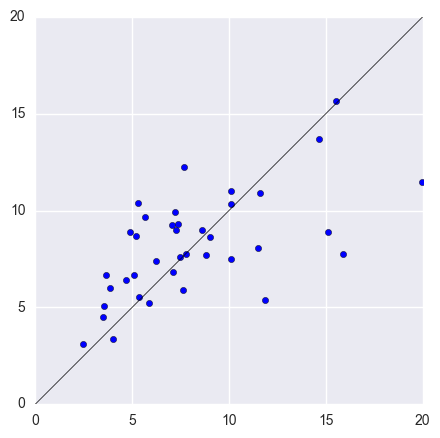

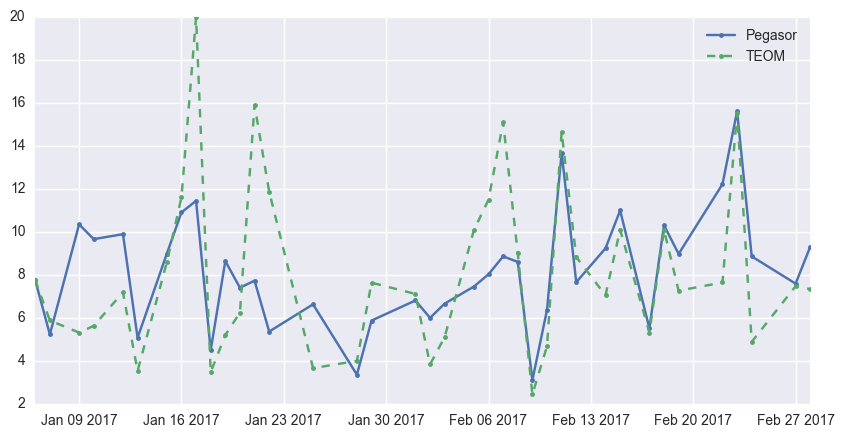

In [384]:
x=daily2['PM2.5_FEM_MC (ug/m3)'][daily2['pct']>pct]
y=daily2['PM2.5-2 (ug/m3)'][daily2['pct']>pct]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('y = %sx + %s' % (round(slope,2),round(intercept,2)))
plt.figure(figsize=(5,5))
plt.xlim(0,20)
plt.ylim(0,20)
plt.scatter(x,y*(x/y).mean())
plt.plot([0,20], [0, 20], color='k', linestyle='-', linewidth=0.5)
print(len(x),'out of',len(daily2))
print((x/y).mean())
plt.figure(figsize=(10,5))
plt.plot(daily2['date'][daily2['pct']>pct],(daily2['PM2.5-2 (ug/m3)'][daily2['pct']>pct]*6.4),'.-',label='Pegasor')
plt.plot(daily2['date'][daily2['pct']>pct],daily2['PM2.5_FEM_MC (ug/m3)'][daily2['pct']>pct],'.--',label='TEOM')
plt.legend()

r-squared: 0.282662470197
y = 0.59x + 10065.61


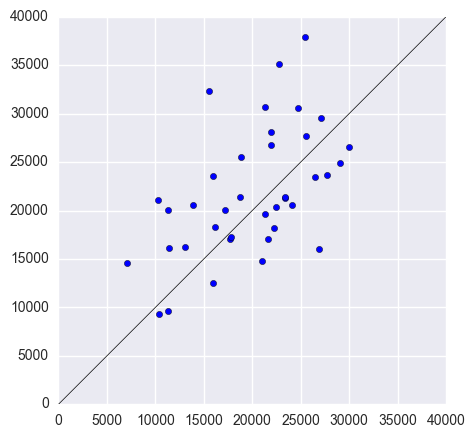

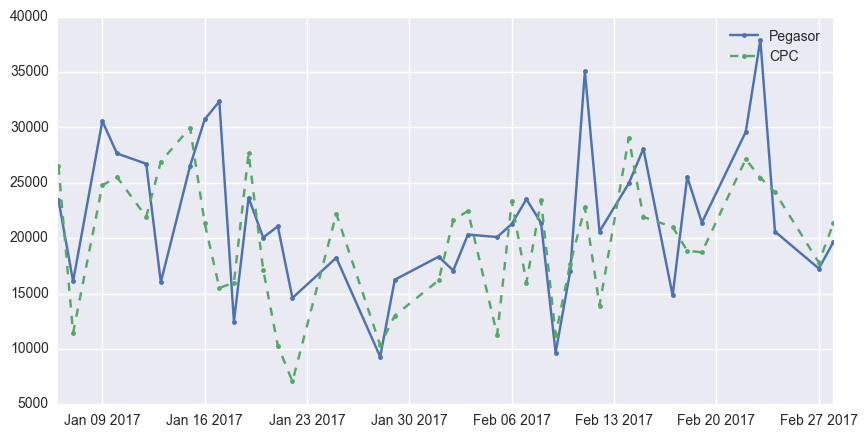

In [340]:
x=daily2['Ultrafine (#/cm3)'][daily2['pct']>pct]
y=daily2['PN-1 (#/cm3)'][daily2['pct']>pct]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print('y = %sx + %s' % (round(slope,2),round(intercept,2)))
plt.figure(figsize=(5,5))
plt.xlim(0,40000)
plt.ylim(0,40000)
plt.scatter(x,y)
plt.plot([0,40000], [0, 40000], color='k', linestyle='-', linewidth=0.5)

plt.figure(figsize=(10,5))
plt.plot(daily2['date'][daily2['pct']>pct],(daily2['PN-1 (#/cm3)'][daily2['pct']>pct]),'.-',label='Pegasor')
plt.plot(daily2['date'][daily2['pct']>pct],daily2['Ultrafine (#/cm3)'][daily2['pct']>pct],'.--',label='CPC')
plt.legend()